# &#x1F4D1; &nbsp; $\mathfrak {\color{#228B22} { Keras \ Cookbook}}$
## 0. Code Library and Links

In [1]:
import numpy as np 
import pandas as pd
import os

import scipy
import cv2
import seaborn
import time

from skimage import io
import matplotlib.pylab as plt
from matplotlib import cm

%matplotlib inline

In [2]:
import keras

Using TensorFlow backend.


In [3]:
import tensorflow.examples.tutorials.mnist as mnist

In [4]:
from keras.datasets import cifar10, imdb, boston_housing

In [5]:
from keras.preprocessing.image import ImageDataGenerator

In [6]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [50]:
from keras.preprocessing import sequence
from keras.preprocessing import image as keras_image

In [8]:
from keras.utils import to_categorical

In [48]:
from keras.models import Sequential, Model
from keras.models import load_model, model_from_json

In [47]:
from keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D
from keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling2D
from keras.layers.embeddings import Embedding

In [11]:
from keras.layers import Dense, LSTM
from keras.layers import Activation, Flatten, Dropout
from keras.layers import Input, BatchNormalization

In [46]:
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions

In [12]:
from keras.layers.advanced_activations import PReLU

In [51]:
from keras.callbacks import ModelCheckpoint

## 1. Backend

In [13]:
'''
/.keras/keras.json
{"image_data_format": "channels_last",
 "epsilon": 1e-07,
 "floatx": "float32",
 "backend": "tensorflow"}
'''
''''''

''

In [14]:
# variants: "theano", "tensorflow", "cntk"
keras.backend.backend()

'tensorflow'

In [15]:
keras.backend.image_dim_ordering()

'tf'

In [16]:
def loss_plot(fit_history):
    plt.figure(figsize=(18, 4))

    plt.plot(fit_history.history['loss'], label = 'train')
    plt.plot(fit_history.history['val_loss'], label = 'test')

    plt.legend()
    plt.title('Loss Function');  
    
def mae_plot(fit_history):
    plt.figure(figsize=(18, 4))

    plt.plot(fit_history.history['mean_absolute_error'], label = 'train')
    plt.plot(fit_history.history['val_mean_absolute_error'], label = 'test')

    plt.legend()
    plt.title('Mean Absolute Error'); 

def acc_plot(fit_history):
    plt.figure(figsize=(18, 4))

    plt.plot(fit_history.history['acc'], label = 'train')
    plt.plot(fit_history.history['val_acc'], label = 'test')

    plt.legend()
    plt.title('Accuracy');     

## 2. Data Samples

In [77]:
# 32x32 color images; 50,000 - the train set; 10,000 - the test set; labeled over 10 categories
(x_train1, y_train1), (x_test1, y_test1) = cifar10.load_data()

In [78]:
(x_train1.shape, y_train1.shape), (x_test1.shape, y_test1.shape)

(((50000, 32, 32, 3), (50000, 1)), ((10000, 32, 32, 3), (10000, 1)))

Label:  9


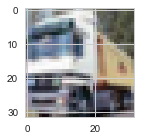

In [79]:
print('Label: ', y_train1[1][0])
plt.figure(figsize=(2,2))
plt.imshow(x_train1[1]);

In [20]:
# 28x28 grayscale images; 55,000 - the train set; 10,000 - the test set; labeled over 10 categories
mnist_data = mnist.input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [21]:
(x_train2, y_train2), (x_test2, y_test2) = \
(mnist_data.train.images, mnist_data.train.labels), (mnist_data.test.images, mnist_data.test.labels)

In [22]:
(x_train2.shape, y_train2.shape), (x_test2.shape, y_test2.shape)

(((55000, 784), (55000, 10)), ((10000, 784), (10000, 10)))

In [23]:
y_test2_class = []

for i in range(10000):
    y_test2_class.append(np.argmax(y_test2[i]))
    
y_test2_class = np.array(y_test2_class)

[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


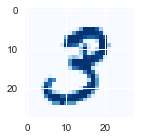

In [24]:
print(y_train2[1])
plt.figure(figsize=(2,2))
plt.imshow(x_train2[1].reshape(28,28), cmap=cm.Blues);

In [25]:
# 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative)
num_words, max_length, embedding_vector_length = 10000, 1000, 32
(x_train3, y_train3), (x_test3, y_test3) = imdb.load_data(path="imdb_full.pkl", num_words=num_words,
                                                          skip_top=0, maxlen=max_length, seed=113,
                                                          start_char=1, oov_char=2, index_from=3)

In [26]:
(x_train3.shape, y_train3.shape), (x_test3.shape, y_test3.shape)

(((25000,), (25000,)), ((24819,), (24819,)))

In [27]:
# 13 attributes of houses at different locations, targets are the median values of the houses at a location (in k$)
(x_train4, y_train4), (x_test4, y_test4) =  boston_housing.load_data()

In [28]:
(x_train4.shape, y_train4.shape), (x_test4.shape, y_test4.shape)

(((404, 13), (404,)), ((102, 13), (102,)))

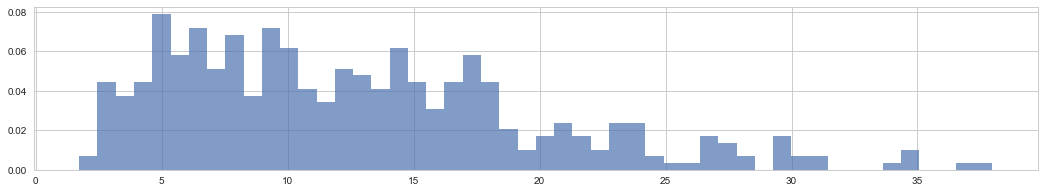

In [29]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(18, 3))
plt.hist(y_train4, bins=50, normed=True, alpha=0.7);

In [30]:
# Classification; the artificial set, labeled over 2 categories 
X5, Y5 = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2)
x_train5, x_test5, y_train5, y_test5 = train_test_split(X5, Y5, test_size = 0.2, random_state = 1)

In [31]:
(x_train5.shape, y_train5.shape), (x_test5.shape, y_test5.shape)

(((800, 2), (800,)), ((200, 2), (200,)))

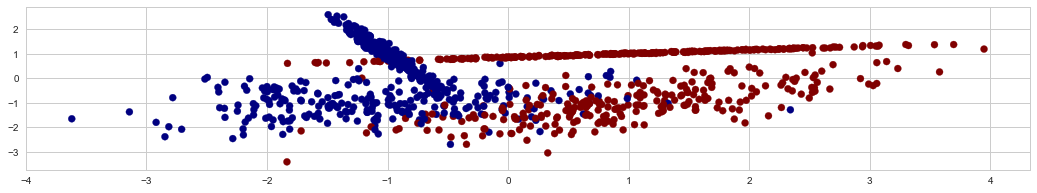

In [32]:
plt.figure(figsize=(18, 3))
plt.scatter(X5[:, 0], X5[:, 1], marker='o', c=Y5, cmap=cm.jet);

In [80]:
# 150x150 grayscale face images; 149 - the train set; 17 - the test set; labeled over 15 categories(persons)
yalefaces_paths = []
yalefaces_images = []
yalefaces_labels = []

for element in os.listdir("yalefaces"):
    if element != 'Readme.txt':
        yalefaces_paths.append(os.path.join("yalefaces", element))
    
for path in yalefaces_paths:
    image = io.imread(path, as_grey=True)
    yalefaces_images.append(image)
    
    label = int(os.path.split(path)[1].split(".")[0].replace("subject", "")) - 1
    yalefaces_labels.append(label) 
    
yalefaces_cut_images = []
face_detector = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
for i in range(len(yalefaces_images)):
    image = yalefaces_images[i]
    face = face_detector.detectMultiScale(image)
    x, y = face[0][:2]
    cut_image = image[y: y+150, x: x+150]
    yalefaces_cut_images.append(cut_image)    

Label:  0


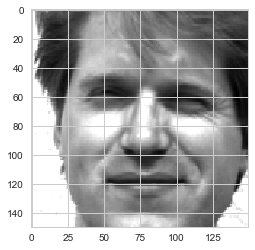

In [81]:
yalefaces_labels = np.array(yalefaces_labels)
yalefaces_cut_images = np.array(yalefaces_cut_images)

print('Label: ', yalefaces_labels[11])
plt.imshow(yalefaces_cut_images[11], cmap='gray');

In [82]:
x_train6, x_test6, y_train6, y_test6 = train_test_split(yalefaces_cut_images, yalefaces_labels, 
                                                        test_size = 0.1, random_state = 1)
[x_train6.shape, y_train6.shape, x_test6.shape, y_test6.shape]

[(149, 150, 150), (149,), (17, 150, 150), (17,)]

## 3. Preprocessing

In [36]:
# Sequence Padding
p_x_train3 = sequence.pad_sequences(x_train3, maxlen=max_length)
p_x_test3 = sequence.pad_sequences(x_test3, maxlen=max_length)

In [83]:
# Normalizing and Reshaping
x_train1 = x_train1/255
x_test1 = x_test1/255

x_train6 = (x_train6).reshape(149, 150*150)
x_test6 = (x_test6).reshape(17, 150*150)
x_train6 = x_train6.astype('float32')/255
x_test6 = x_test6.astype('float32')/255

r_x_train6 = x_train6.reshape(149, 150, 150, 1)
r_x_test6 = x_test6.reshape(17, 150, 150, 1)

In [84]:
# One-Hot Encoding
c_y_train1 = to_categorical(y_train1, 10)
c_y_test1 = to_categorical(y_test1, 10)

c_y_train5 = to_categorical(y_train5, 10)
c_y_test5 = to_categorical(y_test5, 10)

c_y_train6 = to_categorical(y_train6, 15)
c_y_test6 = to_categorical(y_test6, 15)

In [85]:
[x_train5.shape, c_y_train5.shape, x_test5.shape, c_y_test5.shape]

[(800, 2), (800, 10), (200, 2), (200, 10)]

In [86]:
[r_x_train6.shape, c_y_train6.shape, r_x_test6.shape, c_y_test6.shape]

[(149, 150, 150, 1), (149, 15), (17, 150, 150, 1), (17, 15)]

## 4. Models

*Optimizers:*

- 'adam', 'nadam', 
- 'adagrad', 'adadelta', 'adamax',
- 'sgd', 'rmsprop',
- TFOptimizer.

*Loss functions:*

- 'mean_squared_error'('mse'), 'mean_absolute_error'('mae'), 
- 'mean_absolute_percentage_error', 'mean_squared_logarithmic_error',
- 'squared_hinge', 'hinge', 'categorical_hinge',
- 'categorical_crossentropy', 'sparse_categorical_crossentropy',
- 'binary_crossentropy',
- 'kullback_leibler_divergence',
- 'poisson',
- 'cosine_proximity',
- 'logcosh'.

*Metrics:*

- mae, mse, acc,
- binary_accuracy, 
- categorical_accuracy, sparse_categorical_accuracy,
- top_k_categorical_accuracy, sparse_top_k_categorical_accuracy.

----

##### Compilation

*For a multi-class classification problem:*

- model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
- model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

*For a binary classification problem:*

- model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
- model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

*For a mean squared error regression problem:*

- model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
- model.compile(optimizer='sgd', loss='mse', metrics=['mae'])
----

##### Activation
- http://cs231n.github.io/neural-networks-1/

*Types:*

- 'elu', 'selu', 'relu', 'tanh', 'linear', 'softmax', 'softplus', 'softsign', 'sigmoid', 'hard_sigmoid'
- LeakyReLU, PReLU, ELU, ThresholdedReLU

*For a multi-class classification problem:*

- 'softmax'

*For a binary classification problem:*

- 'sigmoid'

*For a mean squared error regression problem:*

- 'linear'

##### Layers

1. *Core Layers*
  - https://keras.io/layers/core/   
  - `Input` layers hold an input tensor (for example, the pixel values of the image with width 32, height 32, and 3 color channels).
  - `Dense` (fully connected) layers compute the class scores, resulting in volume of size. For example, the size [11] corresponds to class scores, such as 10 digits and 1 empty place. Each neuron in these layers are connected to all the numbers in the previous volume.
  - `Activation` applies an activation function to an output. This leaves the size of the volume unchanged.
  - `Dropout` layers consist in randomly setting a fraction rate of input units to 0 at each update during training time, which helps prevent overfitting. This leaves the size of the volume unchanged.
  - `Reshape` layers convert an output to a certain shape.
  - `Flatten` layers flatten the input and collapses it into the one-dimensional feature vector. This results in the volume such as [2, 30, 64] -> [3840].
  - etc.

2. *Convolutional Layers* 
  - http://cs231n.stanford.edu/slides/2016/winter1516_lecture7.pdf
  - https://www.inf.ed.ac.uk/teaching/courses/nlu/lectures/nlu_l15_convolution-2x2.pdf   
  - `Conv1D` layers (temporal convolution) convolve the filter with the signal, i.e. “is sliding over the signal vector, computing dot products”. Here the filter is an integer, the dimensionality of the output space (i.e. the number output of filters in the convolution) and the kernel size is an integer, specifying the length of the 1D convolution window.
  - `Conv2D` layers (spatial convolution over images) compute the output of neurons that are connected to local regions in the input each computing a dot product between their weights and a small region they are connected to in the input volume. This results in the volume such as [64, 64, 1] -> [64, 64, 32] when it was used 32 filters.
  - `Conv3D` layers (spatial convolution over volumes).
  - `SeparableConv2D`, `Conv2DTranspose`.
  - etc.
  
3. *Recurrent Layers*
  - `SimpleRNN` layers are fully-connected RNN. This leaves the size of the volume unchanged.
  - `LSTM` layers.
  - `GRU` layers.
  
4. *Pooling Layers*
  - http://cs231n.github.io/convolutional-networks/ 
  - `MaxPooling2D` layers perform a downsampling operation along the spatial dimensions (width, height). Max-pooling partitions the input image into a set of non-overlapping rectangles and, for each such subregion, outputs the maximum value. This results in the volume such as [28, 28, 32] -> [14, 14, 32].
  - `MaxPooling1D` & `MaxPooling3D` is a max pooling operation for temporal (1D) data and spatial or spatio-temporal (3D) data  respectively.
  
5. *Advanced Activations Layers*
  - `LeakyReLU`.
    - f(x) = alpha * x for x < 0, f(x) = x for x >= 0, alpha is a small gradient.
  - `PReLU`.
    - f(x) = alpha * x for x < 0, f(x) = x for x >= 0, alpha is a learned array.
  - `ELU`.
    - f(x) =  alpha * (exp(x) - 1.) for x < 0, f(x) = x for x >= 0, alpha is a small gradient.
  - `ThresholdedReLU`.
    - f(x) = x for x > theta, f(x) = 0 otherwise.
    
etc.

In [37]:
# The basic example (binary classification)
basic_model = Sequential([Dense(16, input_dim=2), Activation('relu'), Dense(1), Activation('sigmoid')])
basic_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
# Train the model
basic_model.fit(x_train5, y_train5, epochs=100, batch_size=8, verbose=0)
# Predict classes
y_train5_predictions = basic_model.predict_classes(x_train5)

 32/800 [>.............................] - ETA: 0s

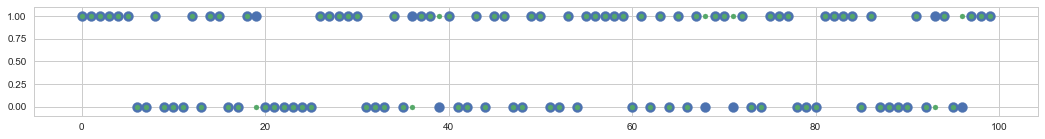

In [39]:
plt.figure(figsize=(18,2))
plt.scatter(range(100), y_train5[:100], s=100)
plt.scatter(range(100), y_train5_predictions[:100], s=25)

In [40]:
# Model performance
basic_score = basic_model.evaluate(x_test5, y_test5, batch_size=200)
basic_score

200/200 [==============================] - 0s


[0.24363216757774353, 0.91500002145767212]

In [41]:
basic_model.input

<tf.Tensor 'dense_1_input:0' shape=(?, 2) dtype=float32>

In [42]:
# Model parameters
basic_model.output_shape

(None, 1)

In [43]:
basic_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                48        
_________________________________________________________________
activation_1 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


In [44]:
basic_model.get_config()

[{'class_name': 'Dense',
  'config': {'activation': 'linear',
   'activity_regularizer': None,
   'batch_input_shape': (None, 2),
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'dtype': 'float32',
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'config': {'distribution': 'uniform',
     'mode': 'fan_avg',
     'scale': 1.0,
     'seed': None}},
   'kernel_regularizer': None,
   'name': 'dense_1',
   'trainable': True,
   'units': 16,
   'use_bias': True}},
 {'class_name': 'Activation',
  'config': {'activation': 'relu', 'name': 'activation_1', 'trainable': True}},
 {'class_name': 'Dense',
  'config': {'activation': 'linear',
   'activity_regularizer': None,
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'c

In [45]:
basic_model.get_weights() 

[array([[  1.14988692e-01,   7.39514053e-01,   8.99778664e-01,
          -4.06576514e-01,   2.93621570e-01,  -6.02392435e-01,
          -9.99462545e-01,   2.70990759e-01,   1.05869889e-01,
          -1.16196406e+00,   7.74778798e-02,   1.34293437e+00,
          -1.03691804e+00,   3.14029157e-01,   2.80083388e-01,
           2.78159708e-01],
        [  1.32857412e-02,   2.70391583e-01,  -2.03058034e-01,
          -7.16618523e-02,  -8.58458161e-01,  -1.85937762e-01,
          -1.45854861e-01,  -7.88422167e-01,  -6.95703566e-01,
          -1.34819821e-01,  -2.60435455e-02,   8.38139653e-01,
          -7.51864514e-04,  -7.27212131e-01,  -8.61169279e-01,
          -5.83565712e-01]], dtype=float32),
 array([-0.31003243,  0.46879435,  0.25011161,  0.0873045 , -0.55469447,
        -0.41464594,  0.12148448, -0.50958979,  0.58887398,  0.17304073,
        -0.23444313,  0.43757468,  0.1355066 , -0.45536536, -0.55971968,
        -0.3492035 ], dtype=float32),
 array([[-0.07733599],
        [ 1.13134

In [46]:
# Optimization
opt = keras.optimizers.rmsprop(lr=0.001, decay=1e-5)
opt2 = keras.optimizers.SGD(lr=0.001, decay=1e-5, momentum=0.9, nesterov=True)

basic_model2 = Sequential([Dense(16, input_dim=2), Activation('relu'), Dense(1), Activation('sigmoid')])
basic_model2.compile(optimizer=opt2, loss='binary_crossentropy', metrics=['accuracy'])

In [47]:
basic_model2.fit(x_train5, y_train5, batch_size=8, epochs=100, verbose=0) 

basic_score2 = basic_model2.evaluate(x_test5, y_test5, batch_size=200)
basic_score2

200/200 [==============================] - 0s


[0.26740512251853943, 0.90499997138977051]

In [56]:
# Advanced activation

# encoder
inp = Input(shape=(2,))
act = PReLU(alpha_initializer='zeros')
lay = Dense(16, kernel_initializer='uniform', name='encoder')(inp)
lay = act(lay)

# decoder
out = Dense(1, kernel_initializer='uniform', activation='sigmoid', name='decoder')(lay)

# model
basic_model3 = Model(inputs=inp, outputs=out, name='cae')
basic_model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [57]:
basic_model3.fit(x_train5, y_train5, epochs=100, batch_size=8, verbose=0)
basic_model3.evaluate(x_test5, y_test5, batch_size=200)

200/200 [==============================] - 0s


[0.24644076824188232, 0.9100000262260437]

In [58]:
# Save/reload models
basic_model.save('basic_model_file.h5')
my_basic_model = load_model('basic_model_file.h5')

In [53]:
ResNet50_model = ResNet50(weights='imagenet')
ResNet50_model_json = ResNet50_model.to_json()

with open("resnet50.json", "w") as json_file:
    json_file.write(ResNet50_model_json)

# json_file = open('resnet50.json', 'r')
# ResNet50_model_json = json_file.read()
# json_file.close()

# ResNet50_model = model_from_json(ResNet50_model_json)

## 5. Neural Networks
### 5.1 Multi-layer Perceptron

In [422]:
# MLP: Binary Classification
def mlp_bc_model():
    model = Sequential()
    
    model.add(Dense(8, input_dim=2, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(16, kernel_initializer='uniform', activation='relu'))
    
    model.add(Dropout(0.25))
    
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [423]:
mlp_bc_model = mlp_bc_model()
mlp_bc_model.fit(x_train5, y_train5, epochs=100, batch_size=8, verbose=0)
y_train5_mlp_predictions = mlp_bc_model.predict_classes(x_train5)
y_test5_mlp_predictions = mlp_bc_model.predict_classes(x_test5)

 32/200 [===>..........................] - ETA: 0s 

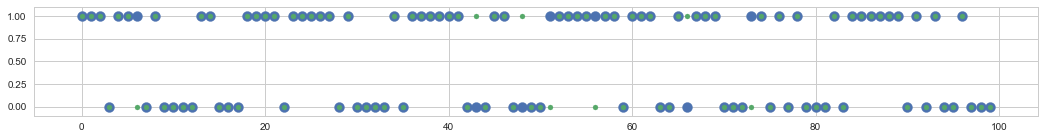

In [424]:
plt.figure(figsize=(18,2))
plt.scatter(range(100), y_test5[:100], s=100)
plt.scatter(range(100), y_test5_mlp_predictions[:100], s=25);

In [425]:
mlp_bc_test_score = mlp_bc_model.evaluate(x_test5, y_test5, batch_size=200)
mlp_bc_test_score

200/200 [==============================] - 2s


[0.25528141856193542, 0.91500002145767212]

In [31]:
# MLP: Multi-Class Classification
def mlp_mc_model():
    model = Sequential()
    
    model.add(Dense(196, activation='relu', input_shape=(784,)))
    model.add(Dropout(0.2))
    
    model.add(Dense(784, activation='relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [32]:
mlp_mc_model = mlp_mc_model()
mlp_mc_model.fit(x_train2, y_train2, epochs=10, batch_size=8, verbose=0)
y_train2_mlp_predictions = mlp_mc_model.predict_classes(x_train2)
y_test2_mlp_predictions = mlp_mc_model.predict_classes(x_test2)

10000/10000 [==============================] - 1s      

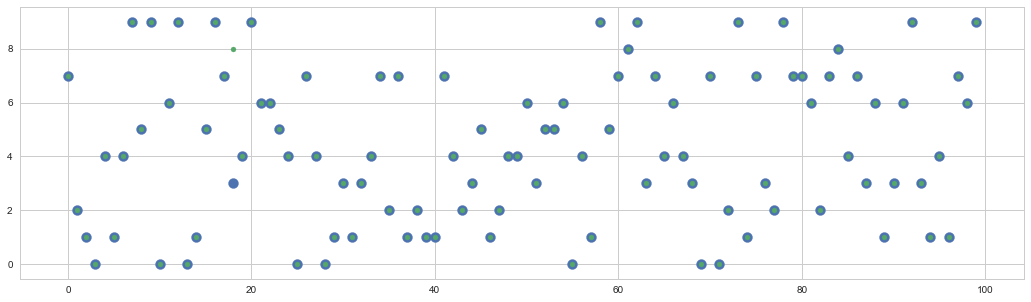

In [132]:
plt.figure(figsize=(18,5))
plt.scatter(range(100), y_test2_class[:100], s=100)
plt.scatter(range(100), y_test2_mlp_predictions[:100], s=25);

In [54]:
mlp_mc_test_score = mlp_mc_model.evaluate(x_test2, y_test2)
mlp_mc_test_score

 9664/10000 [===========================>..] - ETA: 0s  

[0.10468304518835775, 0.97789999999999999]

In [68]:
# MLP: Multi-Class Classification
def mlp_mc_model2():
    model = Sequential()
    
    model.add(Dense(512, activation='relu', input_shape=(22500,)))
    model.add(Dropout(0.15))
    
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.15))
    
    model.add(Dense(15, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [69]:
mlp_mc_model2 = mlp_mc_model2()
mlp_mc_history2 = mlp_mc_model2.fit(x_train6, c_y_train6,
                                    validation_data=(x_test6, c_y_test6),
                                    epochs=70, batch_size=64, verbose=0)
y_train6_mlp_predictions = mlp_mc_model2.predict_classes(x_train6)
y_test6_mlp_predictions = mlp_mc_model2.predict_classes(x_test6)

17/17 [==============================] - 0s


In [70]:
mlp_mc_test_score2 = mlp_mc_model2.evaluate(x_test6, c_y_test6)
mlp_mc_test_score2

17/17 [==============================] - 0s


[0.11638676375150681, 1.0]

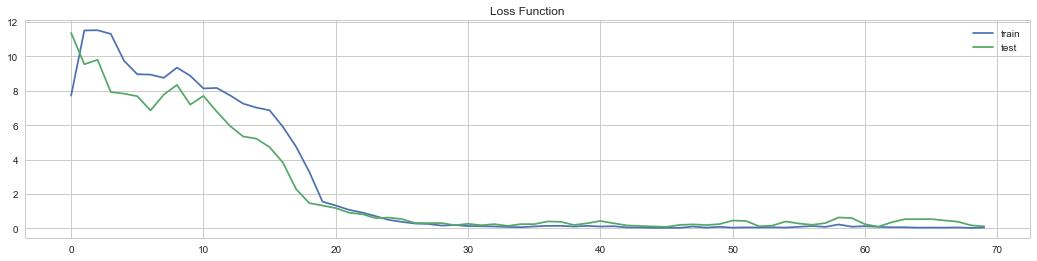

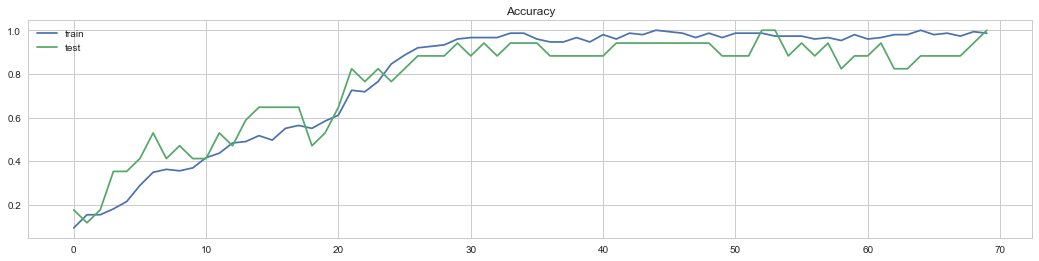

In [71]:
loss_plot(mlp_mc_history2)
acc_plot(mlp_mc_history2)

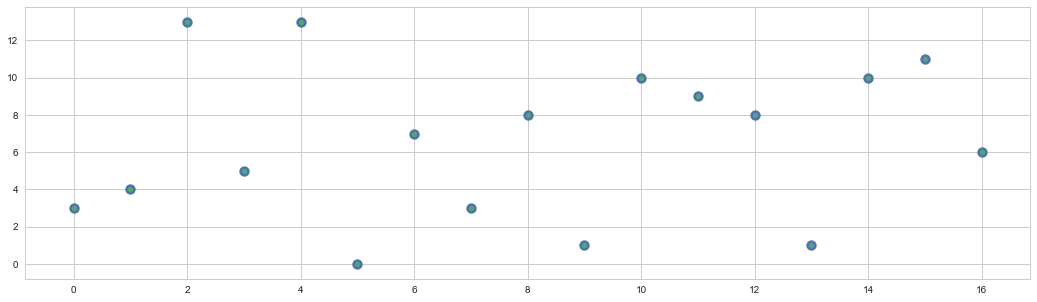

In [72]:
plt.figure(figsize=(18,5))
plt.scatter(range(17), y_test6, s=100)
plt.scatter(range(17), y_test6_mlp_predictions, s=25);

In [124]:
# MLP: Regression
def mlp_reg_model():
    model = Sequential()
    
    model.add(Dense(13, activation='relu', input_dim=13))    
    model.add(Dense(104, activation='relu'))   
    model.add(Dense(416, activation='relu'))
    
    model.add(Dense(1))

    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae']) 
    
    return model

In [125]:
mlp_reg_model = mlp_reg_model()
mlp_reg_history = mlp_reg_model.fit(x_train4, y_train4, epochs=100, batch_size=16, verbose=0,
                                    validation_data=(x_test4, y_test4))
y_train4_mlp_predictions = mlp_reg_model.predict(x_train4)
y_test4_mlp_predictions = mlp_reg_model.predict(x_test4)

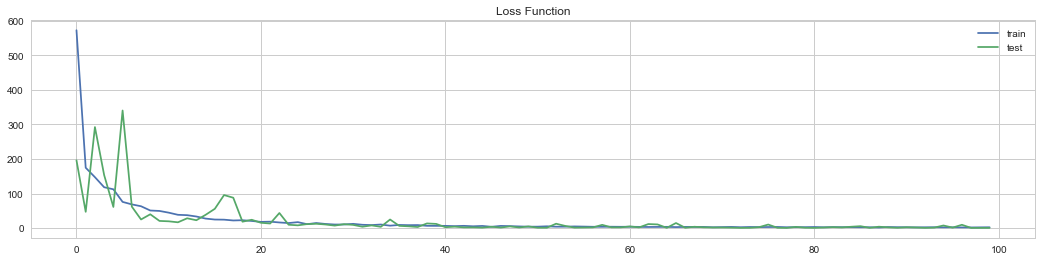

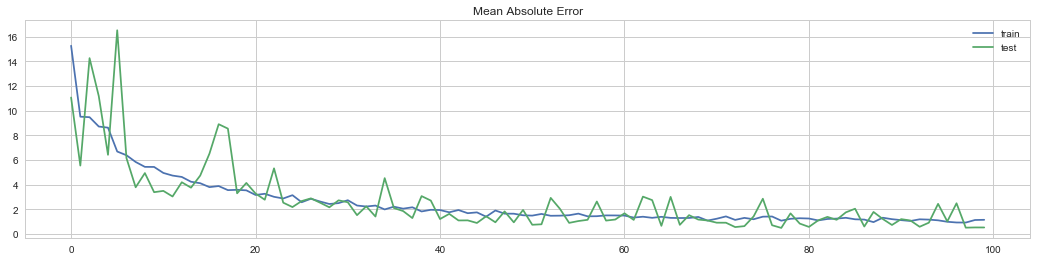

In [127]:
loss_plot(mlp_reg_history)
mae_plot(mlp_reg_history)

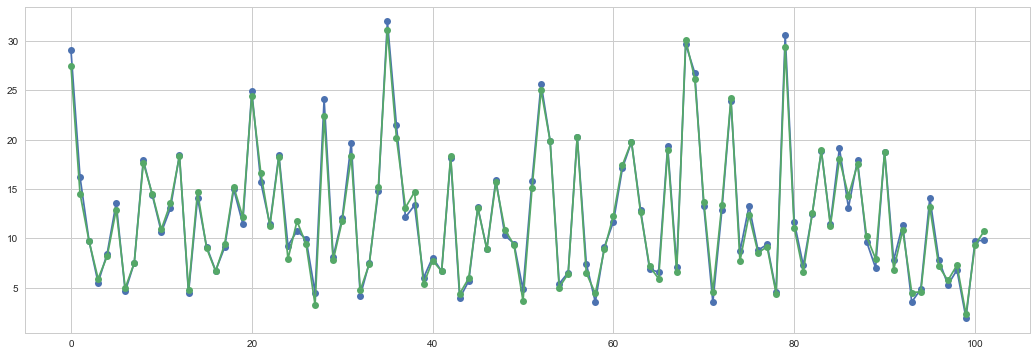

In [128]:
plt.figure(figsize=(18,6))
plt.plot(range(len(y_test4)), y_test4, '-o', label = 'real data')
plt.plot(range(len(y_test4)), y_test4_mlp_predictions, '-o', label = 'predictions');

In [129]:
mlp_reg_test_score = mlp_reg_model.evaluate(x_test4, y_test4, batch_size=102)
mlp_reg_test_score

102/102 [==============================] - 0s


[0.45933929085731506, 0.54101449251174927]

### 5.2 Convolutional Neural Network (CNN)

In [49]:
# CNN: Binary Classification
def cnn_bc_model():
    model = Sequential()
    
    model.add(Conv1D(filters=16, kernel_size=5, padding='same', 
                     activation='relu', input_shape=(2,1)))
    model.add(Conv1D(filters=16, kernel_size=5, padding='same', activation='relu'))
    
    model.add(MaxPooling1D(pool_size=2))   
    model.add(Dropout(0.25))  

    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [50]:
cnn_bc_model = cnn_bc_model()
cnn_bc_model.fit(x_train5.reshape(800, 2, 1), y_train5.reshape(800, 1, 1), epochs=100, batch_size=8, verbose=0,
                 validation_data=(x_test5.reshape(200, 2, 1), y_test5.reshape(200, 1, 1)))
y_train5_cnn_predictions = cnn_bc_model.predict_classes(x_train5.reshape(800, 2, 1))
y_test5_cnn_predictions = cnn_bc_model.predict_classes(x_test5.reshape(200, 2, 1))

 32/200 [===>..........................] - ETA: 0s

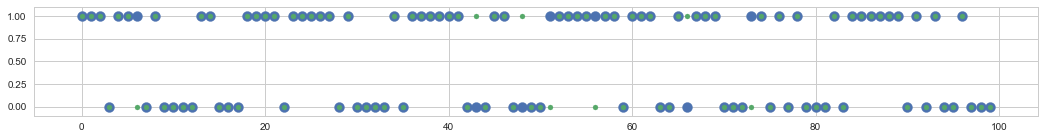

In [51]:
plt.figure(figsize=(18,2))
plt.scatter(range(100), y_test5[:100], s=100)
plt.scatter(range(100), y_test5_cnn_predictions[:100], s=25);

In [52]:
cnn_bc_test_score = cnn_bc_model.evaluate(x_test5.reshape(200, 2, 1), y_test5.reshape(200, 1, 1), batch_size=200)
cnn_bc_test_score

200/200 [==============================] - 0s


[0.20631805062294006, 0.91500002145767212]

In [70]:
# CNN: LSTM For Sequence Classification
def cnn_lstm_model():
    model = Sequential()

    model.add(Embedding(num_words, embedding_vector_length, input_length=max_length))

    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    
    model.add(LSTM(32))
    
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])
    
    return model

In [71]:
cnn_lstm_model = cnn_lstm_model()
cnn_lstm_history = cnn_lstm_model.fit(p_x_train3, y_train3, epochs=3, batch_size=128,
                                      validation_data=(p_x_test3, y_test3))

Train on 25000 samples, validate on 24819 samples
Epoch 1/3
25000/25000 [==============================] - 511s - loss: 0.4403 - acc: 0.7875 - val_loss: 0.3575 - val_acc: 0.8494

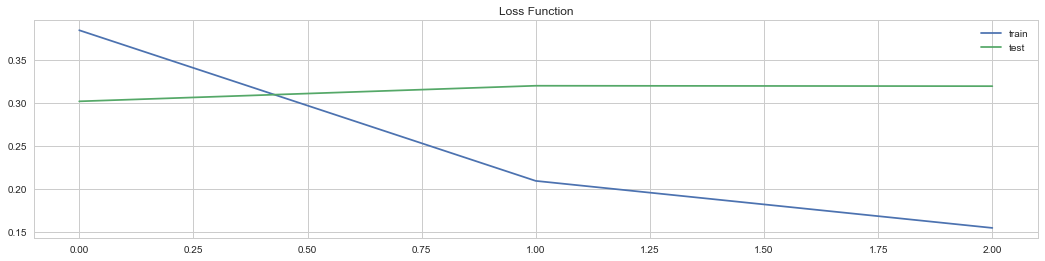

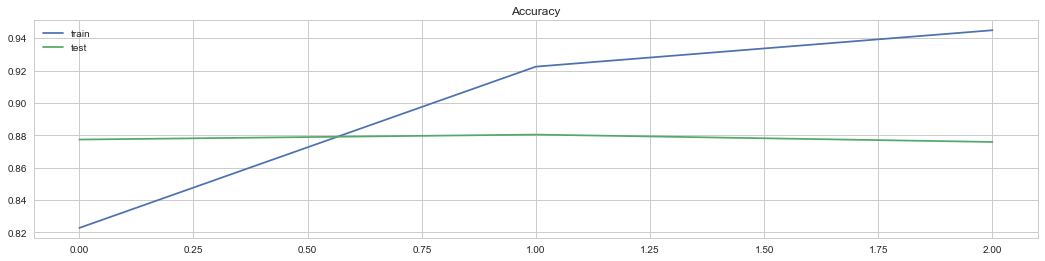

In [69]:
loss_plot(cnn_lstm_history)
acc_plot(cnn_lstm_history)

In [112]:
cnn_lstm_scores = cnn_lstm_model.evaluate(p_x_test3, y_test3, verbose=2)
print("Accuracy: %.2f%%" % (cnn_lstm_scores[1]*100))

Accuracy: 87.09%


In [87]:
# VGG-like CNN: Multi-Class Classification
def cnn_vgg_model():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train1.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(96, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3, 3)))
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5)) 

    model.add(Dense(10))
    model.add(Activation('softmax'))

#     opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [88]:
cnn_vgg_model = cnn_vgg_model()
cnn_vgg_history = cnn_vgg_model.fit(x_train1, c_y_train1, 
                                    epochs=20, batch_size=128, verbose=2,
                                    validation_data=(x_test1, c_y_test1))

y_train1_cnn_predictions = cnn_vgg_model.predict_classes(x_train1)
y_test1_cnn_predictions = cnn_vgg_model.predict_classes(x_test1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
526s - loss: 1.7451 - acc: 0.3442 - val_loss: 1.3363 - val_acc: 0.5174
Epoch 2/20
456s - loss: 1.3066 - acc: 0.5275 - val_loss: 1.1215 - val_acc: 0.5994
Epoch 3/20
443s - loss: 1.1168 - acc: 0.6063 - val_loss: 0.9687 - val_acc: 0.6632
Epoch 4/20
439s - loss: 0.9920 - acc: 0.6547 - val_loss: 0.8532 - val_acc: 0.7056
Epoch 5/20
438s - loss: 0.9082 - acc: 0.6851 - val_loss: 0.8113 - val_acc: 0.7175
Epoch 6/20
437s - loss: 0.8463 - acc: 0.7074 - val_loss: 0.7654 - val_acc: 0.7378
Epoch 7/20
436s - loss: 0.7862 - acc: 0.7245 - val_loss: 0.7274 - val_acc: 0.7515
Epoch 8/20
437s - loss: 0.7496 - acc: 0.7396 - val_loss: 0.6914 - val_acc: 0.7644
Epoch 9/20
439s - loss: 0.7077 - acc: 0.7555 - val_loss: 0.6878 - val_acc: 0.7600
Epoch 10/20
440s - loss: 0.6779 - acc: 0.7631 - val_loss: 0.6729 - val_acc: 0.7664
Epoch 11/20
459s - loss: 0.6508 - acc: 0.7739 - val_loss: 0.6916 - val_acc: 0.7663
Epoch 12/20
472s - loss: 0.6291 - acc: 0.7817 

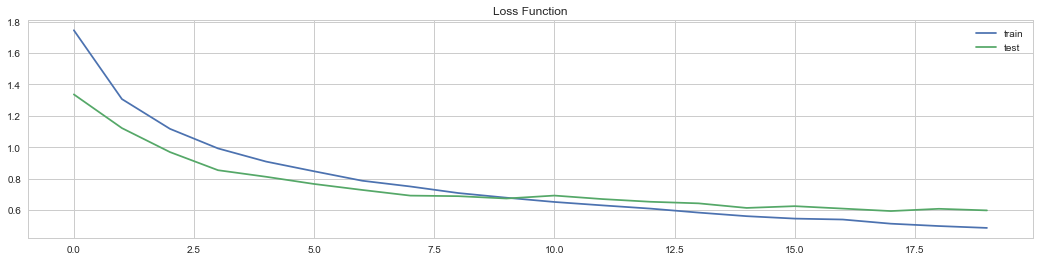

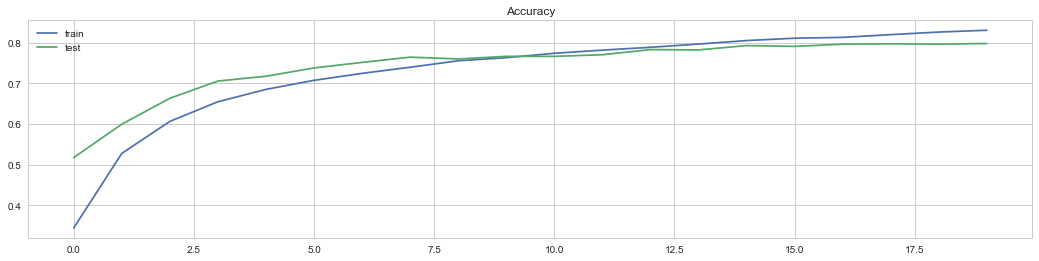

In [89]:
loss_plot(cnn_vgg_history)
acc_plot(cnn_vgg_history)

In [91]:
# steps = x_train1.shape[0]
steps, epochs = 500, 10
data_generator = ImageDataGenerator(zoom_range=0.2, horizontal_flip=True)
dg_cnn_vgg_history = \
cnn_vgg_model.fit_generator(data_generator.flow(x_train1, c_y_train1, batch_size=128),
                            steps_per_epoch = steps, epochs = epochs, verbose=2, 
                            validation_data = (x_test1, c_y_test1))

Epoch 1/10
677s - loss: 0.7638 - acc: 0.7422 - val_loss: 0.6062 - val_acc: 0.7944
Epoch 2/10
716s - loss: 0.7270 - acc: 0.7530 - val_loss: 0.5926 - val_acc: 0.7990
Epoch 3/10
781s - loss: 0.7134 - acc: 0.7578 - val_loss: 0.5825 - val_acc: 0.8035
Epoch 4/10
735s - loss: 0.6885 - acc: 0.7643 - val_loss: 0.6194 - val_acc: 0.7899
Epoch 5/10
826s - loss: 0.6869 - acc: 0.7678 - val_loss: 0.5764 - val_acc: 0.8024
Epoch 6/10
753s - loss: 0.6786 - acc: 0.7682 - val_loss: 0.5523 - val_acc: 0.8121
Epoch 7/10
709s - loss: 0.6657 - acc: 0.7718 - val_loss: 0.5581 - val_acc: 0.8094
Epoch 8/10
699s - loss: 0.6582 - acc: 0.7762 - val_loss: 0.5536 - val_acc: 0.8114
Epoch 9/10
662s - loss: 0.6481 - acc: 0.7784 - val_loss: 0.5845 - val_acc: 0.8051
Epoch 10/10
684s - loss: 0.6410 - acc: 0.7809 - val_loss: 0.5472 - val_acc: 0.8123


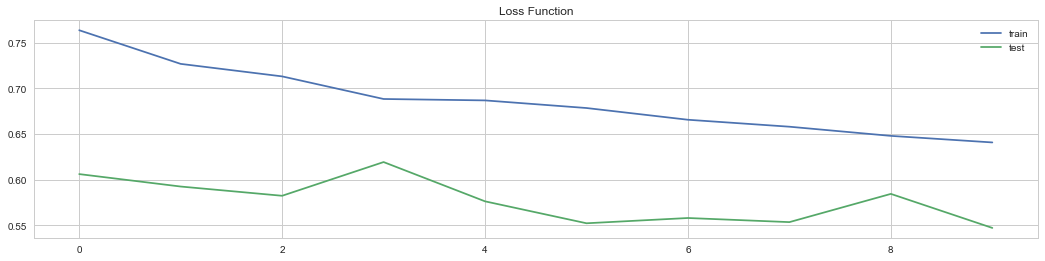

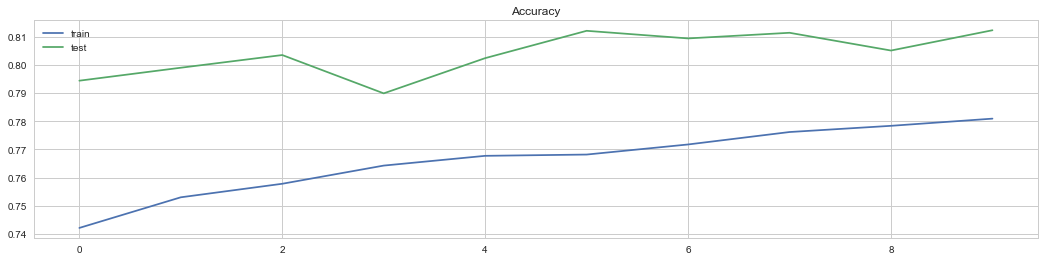

In [92]:
loss_plot(dg_cnn_vgg_history)
acc_plot(dg_cnn_vgg_history)

In [93]:
y_train1_dg_cnn_predictions = cnn_vgg_model.predict_classes(x_train1)
y_test1_dg_cnn_predictions = cnn_vgg_model.predict_classes(x_test1)

10000/10000 [==============================] - 35s     

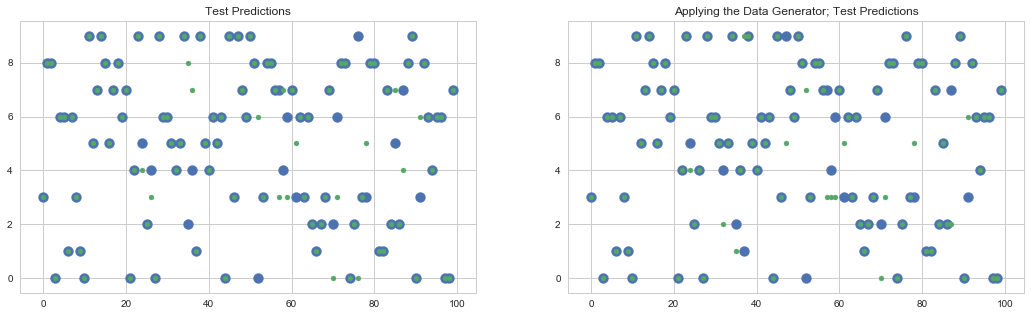

In [94]:
plt.figure(1, figsize=(18, 5))
plt.subplot(121)
plt.scatter(range(100), y_test1[:100], s=100)
plt.scatter(range(100), y_test1_cnn_predictions[:100], s=25)
plt.title("Test Predictions")
plt.subplot(122)
plt.scatter(range(100), y_test1[:100], s=100)
plt.scatter(range(100), y_test1_dg_cnn_predictions[:100], s=25)
plt.title("Applying the Data Generator; Test Predictions");

In [95]:
cnn_vgg_model.save('cnn_vgg_model_f12.h5')
# cnn_vgg_model = load_model('cnn_vgg_model_f11.h5')

In [96]:
cnn_vgg_test_scores = cnn_vgg_model.evaluate(x_test1, c_y_test1)
print("Accuracy: %.2f%%" % (cnn_vgg_test_scores[1]*100))

10000/10000 [==============================] - 32s     

In [90]:
# VGG-like CNN: Multi-Class Classification
def cnn_vgg_model2():
    model = Sequential()
    model.add(Conv2D(48, (3, 3), padding='same', activation='relu',
                            input_shape=x_train1.shape[1:]))
    model.add(Conv2D(48, (3, 3), activation='relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(96, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(96, (3, 3), activation='relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(192, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(192, (3, 3), activation='relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

cnn_vgg_model2 = cnn_vgg_model2()
cnn_vgg_history2 = cnn_vgg_model2.fit(x_train1, c_y_train1, 
                                      validation_data = (x_test1, c_y_test1),
                                      batch_size=128, epochs=10, verbose=2)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
1153s - loss: 1.9054 - acc: 0.2620 - val_loss: 1.5529 - val_acc: 0.4271
Epoch 2/10
1484s - loss: 1.4416 - acc: 0.4706 - val_loss: 1.2038 - val_acc: 0.5644
Epoch 3/10
1106s - loss: 1.2065 - acc: 0.5733 - val_loss: 1.1011 - val_acc: 0.6113
Epoch 4/10
4401s - loss: 1.0508 - acc: 0.6332 - val_loss: 0.9347 - val_acc: 0.6801
Epoch 5/10
3415s - loss: 0.9313 - acc: 0.6783 - val_loss: 0.8447 - val_acc: 0.7063
Epoch 6/10
716s - loss: 0.8562 - acc: 0.7091 - val_loss: 0.7554 - val_acc: 0.7372
Epoch 7/10
716s - loss: 0.7931 - acc: 0.7308 - val_loss: 0.7453 - val_acc: 0.7474
Epoch 8/10
712s - loss: 0.7501 - acc: 0.7430 - val_loss: 0.7107 - val_acc: 0.7560
Epoch 9/10
714s - loss: 0.7081 - acc: 0.7588 - val_loss: 0.6945 - val_acc: 0.7665
Epoch 10/10
712s - loss: 0.6770 - acc: 0.7679 - val_loss: 0.6586 - val_acc: 0.7776


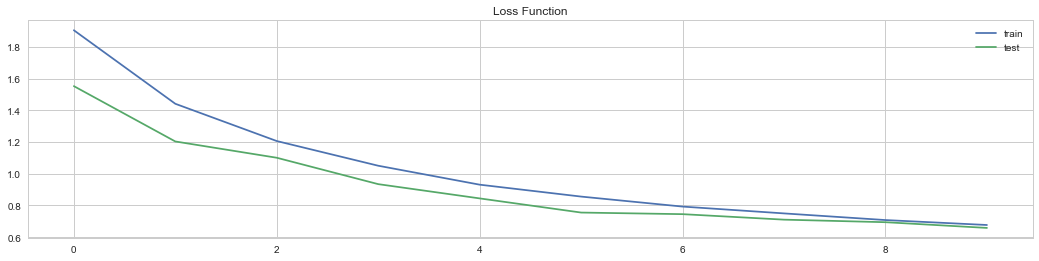

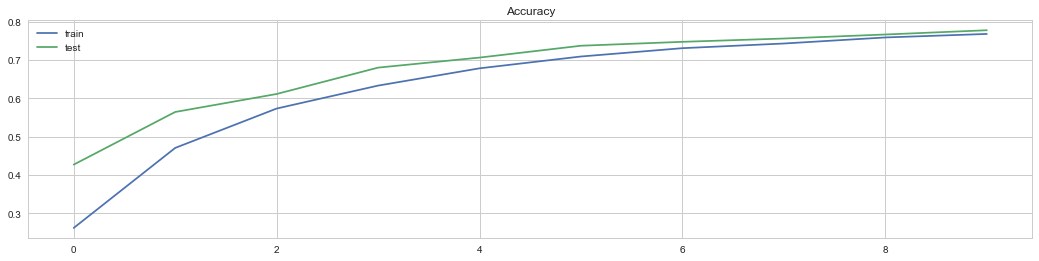

In [91]:
loss_plot(cnn_vgg_history2)
acc_plot(cnn_vgg_history2)

In [92]:
y_train1_cnn_vgg2 = cnn_vgg_model2.predict_classes(x_train1)
y_test1_cnn_vgg2 = cnn_vgg_model2.predict_classes(x_test1)

10000/10000 [==============================] - 51s     

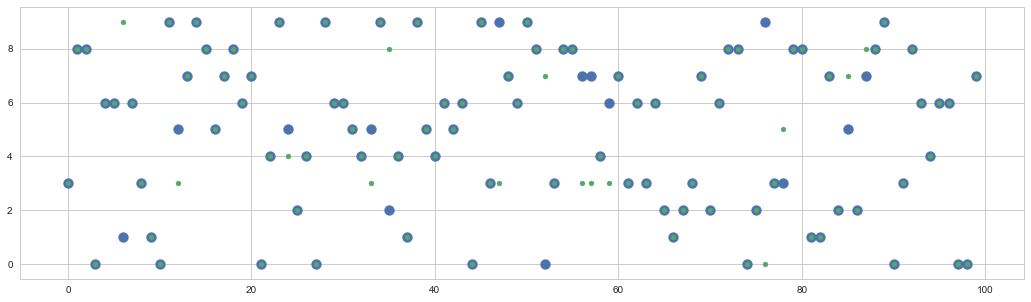

In [93]:
plt.figure(figsize=(18, 5))
plt.scatter(range(100), y_test1[:100], s=100)
plt.scatter(range(100), y_test1_cnn_vgg2[:100], s=25);

In [94]:
cnn_vgg_model.save('cnn_vgg_model2_f11.h5')
# cnn_vgg_model2 = load_model('cnn_vgg_model2_f11.h5')

In [329]:
# CNN: Regression
def cnn_reg_model():
    model = Sequential()
    
#    model.add(BatchNormalization(input_shape=(13,1)))
        
    model.add(Conv1D(13, 5, padding='valid', activation='relu', input_shape=(13,1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.2))

    model.add(Conv1D(104, 3, padding='valid', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.2))
    
    model.add(Flatten())

    model.add(Dense(832, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.4))

    model.add(Dense(1, kernel_initializer='normal'))
    
#    opt = keras.optimizers.rmsprop(decay=1e-6)
    
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
    return model    

In [330]:
cnn_reg_model = cnn_reg_model()
cnn_reg_history = cnn_reg_model.fit(x_train4.reshape(404, 13, 1), y_train4, epochs=1600, batch_size=13, verbose=0,
                                    validation_data=(x_test4.reshape(102, 13, 1), y_test4))
y_train4_cnn_predictions = cnn_reg_model.predict(x_train4.reshape(404, 13, 1))
y_test4_cnn_predictions = cnn_reg_model.predict(x_test4.reshape(102, 13, 1))

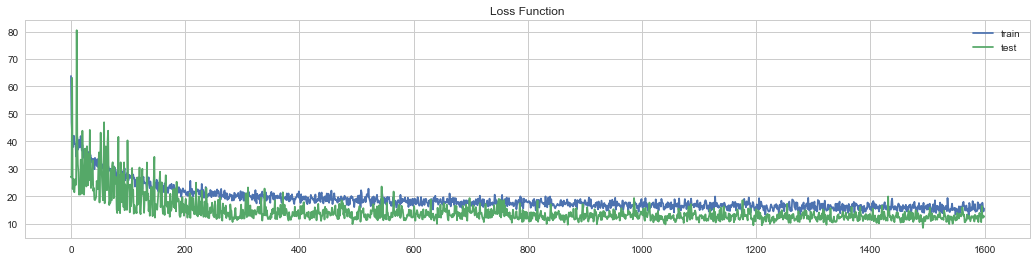

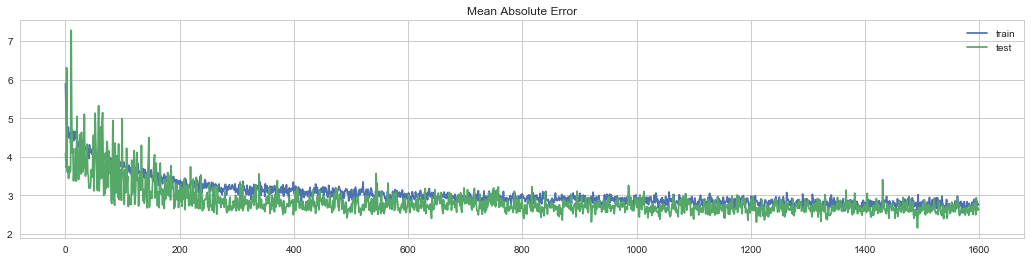

In [331]:
loss_plot(cnn_reg_history)
mae_plot(cnn_reg_history)

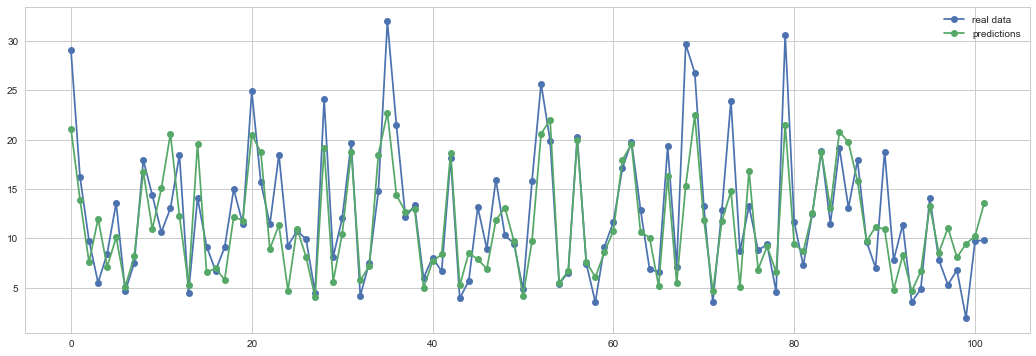

In [324]:
# epochs=400
plt.figure(figsize=(18,6))
plt.plot(range(len(y_test4)), y_test4, '-o', label = 'real data')
plt.plot(range(len(y_test4)), y_test4_cnn_predictions, '-o', label = 'predictions')
plt.legend();

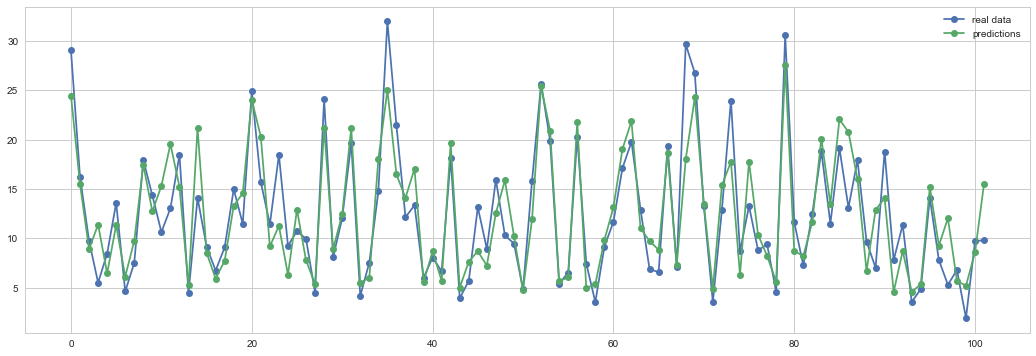

In [328]:
# epochs=800
plt.figure(figsize=(18,6))
plt.plot(range(len(y_test4)), y_test4, '-o', label = 'real data')
plt.plot(range(len(y_test4)), y_test4_cnn_predictions, '-o', label = 'predictions')
plt.legend();

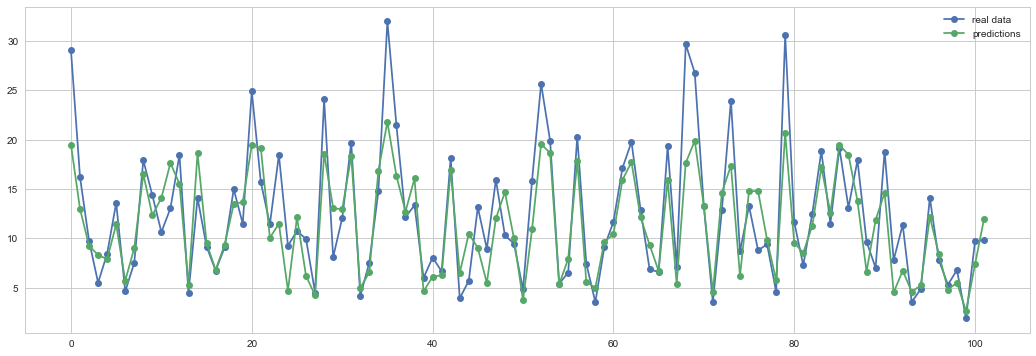

In [332]:
# epochs=1600
plt.figure(figsize=(18,6))
plt.plot(range(len(y_test4)), y_test4, '-o', label = 'real data')
plt.plot(range(len(y_test4)), y_test4_cnn_predictions, '-o', label = 'predictions')
plt.legend();

### 5.3 Recurrent Neural Network (RNN)

In [182]:
# RNN: Binary Classification
def rnn_bc_model():
    model = Sequential()

    model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2, input_shape=(1, 2)))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])     
    
    return model 

In [183]:
rnn_bc_model = rnn_bc_model()
rnn_bc_history = rnn_bc_model.fit(x_train5.reshape(x_train5.shape[0], 1, x_train5.shape[1]), 
                                  y_train5.reshape(y_train5.shape[0], 1), 
                                  epochs=20, batch_size=32, verbose=2,
                                  validation_data=(x_test5.reshape(x_test5.shape[0], 1, x_test5.shape[1]), 
                                                   y_test5.reshape(y_test5.shape[0], 1)))

y_train5_rnn_predictions = rnn_bc_model.predict_classes(x_train5.reshape(x_train5.shape[0], 1, x_train5.shape[1]))
y_test5_rnn_predictions = rnn_bc_model.predict_classes(x_test5.reshape(x_test5.shape[0], 1, x_test5.shape[1]))

Train on 800 samples, validate on 200 samples
Epoch 1/20
11s - loss: 0.6834 - acc: 0.6088 - val_loss: 0.6673 - val_acc: 0.8150
Epoch 2/20
0s - loss: 0.6551 - acc: 0.8000 - val_loss: 0.6397 - val_acc: 0.8700
Epoch 3/20
0s - loss: 0.6261 - acc: 0.8163 - val_loss: 0.6103 - val_acc: 0.8700
Epoch 4/20
0s - loss: 0.5958 - acc: 0.8212 - val_loss: 0.5792 - val_acc: 0.8500
Epoch 5/20
0s - loss: 0.5737 - acc: 0.8025 - val_loss: 0.5488 - val_acc: 0.8400
Epoch 6/20
0s - loss: 0.5333 - acc: 0.8362 - val_loss: 0.5148 - val_acc: 0.8550
Epoch 7/20
0s - loss: 0.5098 - acc: 0.8325 - val_loss: 0.4837 - val_acc: 0.8500
Epoch 8/20
0s - loss: 0.4862 - acc: 0.8625 - val_loss: 0.4541 - val_acc: 0.8550
Epoch 9/20
0s - loss: 0.4539 - acc: 0.8513 - val_loss: 0.4272 - val_acc: 0.8550
Epoch 10/20
0s - loss: 0.4368 - acc: 0.8612 - val_loss: 0.4042 - val_acc: 0.8550
Epoch 11/20
0s - loss: 0.4074 - acc: 0.8575 - val_loss: 0.3842 - val_acc: 0.8600
Epoch 12/20
0s - loss: 0.4017 - acc: 0.8638 - val_loss: 0.3677 - val_ac

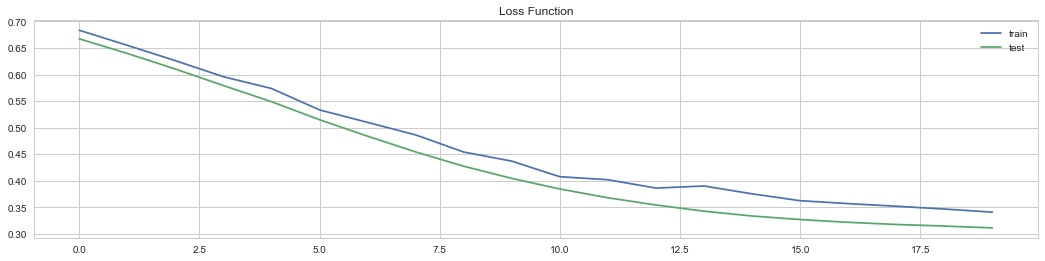

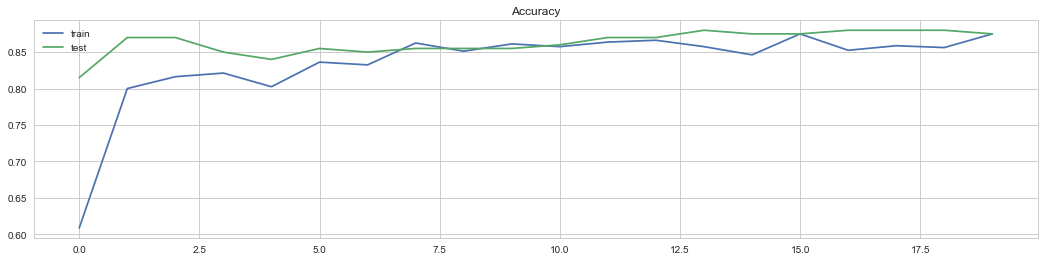

In [184]:
loss_plot(rnn_bc_history)
acc_plot(rnn_bc_history)

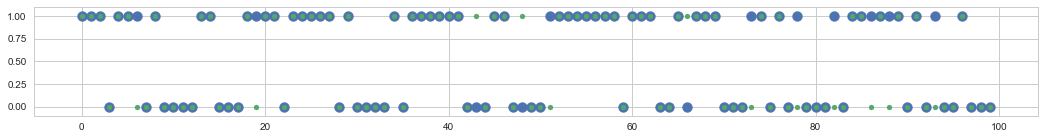

In [185]:
plt.figure(figsize=(18,2))
plt.scatter(range(100), y_test5[:100], s=100)
plt.scatter(range(100), y_test5_rnn_predictions[:100], s=25);

In [126]:
# RNN: Multi-Class Classification
def rnn_mc_model():
    model = Sequential()

    model.add(LSTM(112, return_sequences=True, input_shape=(1,784)))
    
    model.add(LSTM(112, return_sequences=True)) 
    model.add(LSTM(112))  
    
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])    
    return model 

In [127]:
rnn_mc_model = rnn_mc_model()
rnn_mc_history = rnn_mc_model.fit(x_train2.reshape(x_train2.shape[0], 1, x_train2.shape[1]), y_train2, 
                                  epochs=3, batch_size=112, verbose=2,
                                  validation_data=(x_test2.reshape(x_test2.shape[0], 1, x_test2.shape[1]), y_test2))
y_train2_rnn_predictions = rnn_mc_model.predict_classes(x_train2.reshape(x_train2.shape[0], 1, x_train2.shape[1]))
y_test2_rnn_predictions = rnn_mc_model.predict_classes(x_test2.reshape(x_test2.shape[0], 1, x_test2.shape[1]))

Train on 55000 samples, validate on 10000 samples
Epoch 1/3
58s - loss: 0.2995 - acc: 0.9116 - val_loss: 0.3894 - val_acc: 0.9021
Epoch 2/3
32s - loss: 0.1009 - acc: 0.9701 - val_loss: 0.1062 - val_acc: 0.9673
Epoch 3/3
31s - loss: 0.0675 - acc: 0.9792 - val_loss: 0.0952 - val_acc: 0.9709
 9888/10000 [============================>.] - ETA: 0s

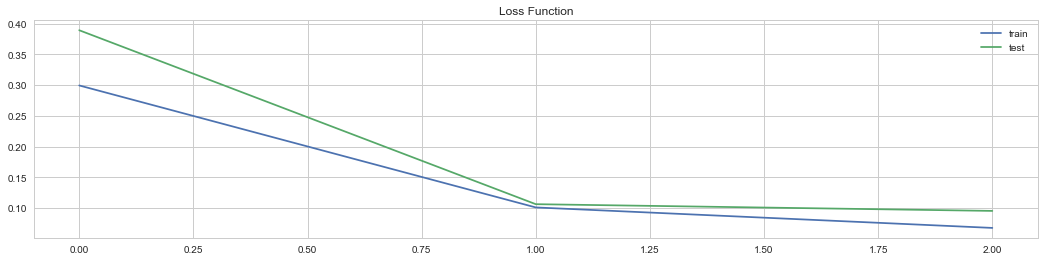

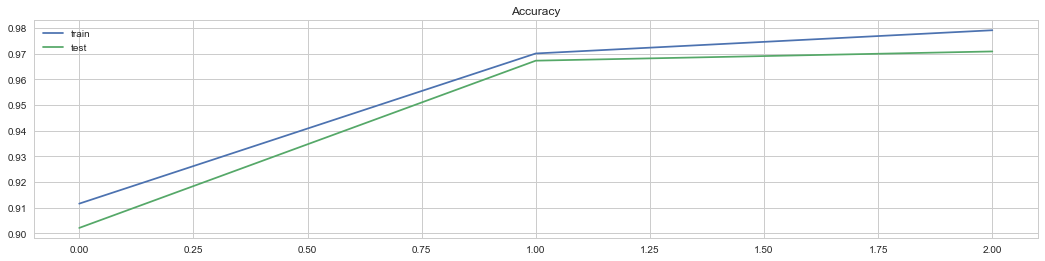

In [128]:
loss_plot(rnn_mc_history)
acc_plot(rnn_mc_history)

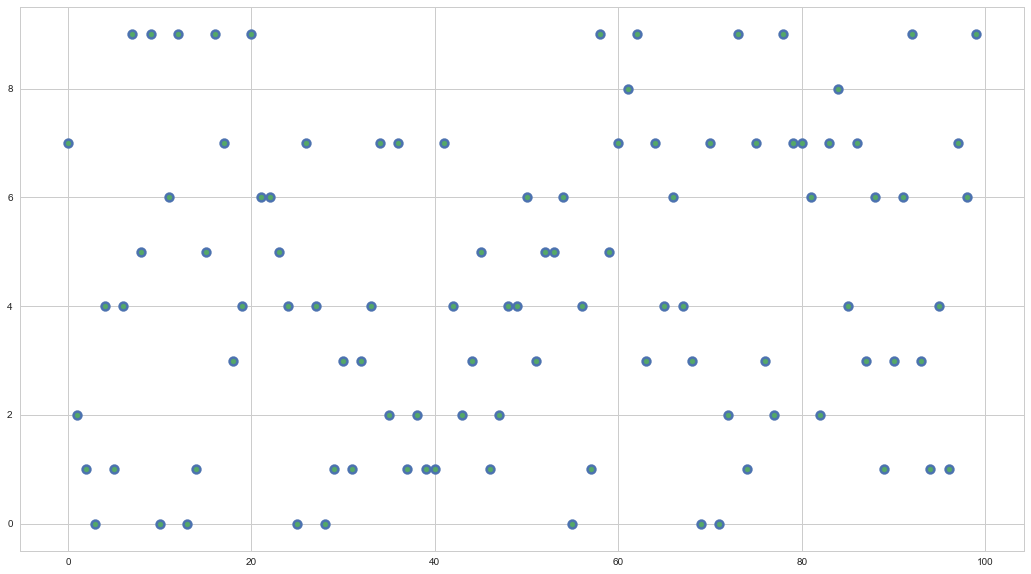

In [131]:
plt.figure(figsize=(18,10))
plt.scatter(range(100), y_test2_class[:100], s=100)
plt.scatter(range(100), y_test2_rnn_predictions[:100], s=25);

In [201]:
# RNN: Regression
def rnn_reg_model():
    model = Sequential()
    
    model.add(LSTM(52, return_sequences=True, input_shape=(1, 13)))
    model.add(LSTM(208, return_sequences=False))   
    
    model.add(Dense(1))

    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae']) 
    
    return model 

In [202]:
rnn_reg_model = rnn_reg_model()

rnn_reg_history = rnn_reg_model.fit(x_train4.reshape(x_train4.shape[0], 1, x_train4.shape[1]), y_train4, 
                                    validation_data=(x_test4.reshape(x_test4.shape[0], 1, x_test4.shape[1]),y_test4), 
                                    epochs=800, verbose=0)

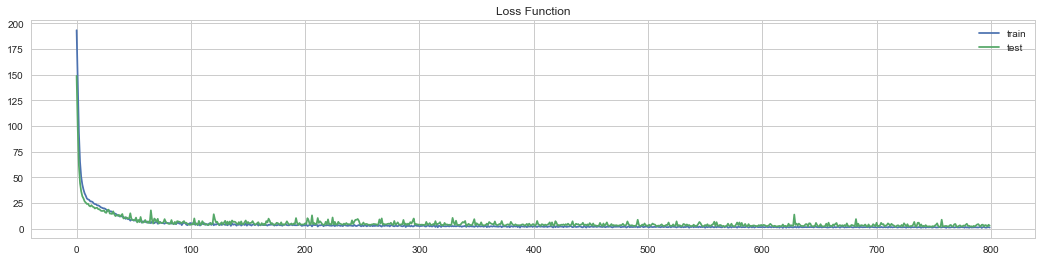

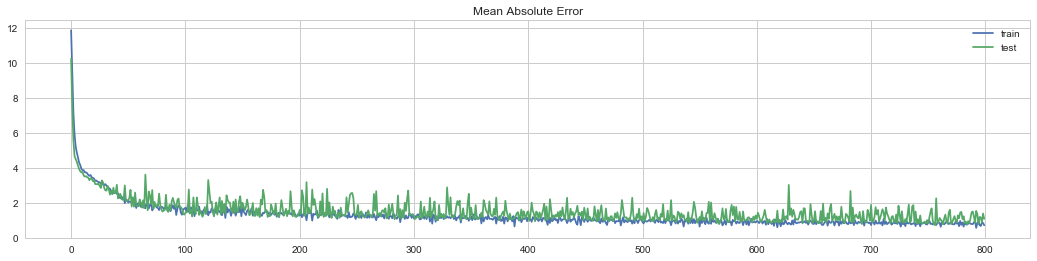

In [203]:
loss_plot(rnn_reg_history)
mae_plot(rnn_reg_history)

In [199]:
y_train4_rnn_predictions = rnn_reg_model.predict(x_train4.reshape(x_train4.shape[0], 1, x_train4.shape[1]))
y_test4_rnn_predictions = rnn_reg_model.predict(x_test4.reshape(102, 1, 13))

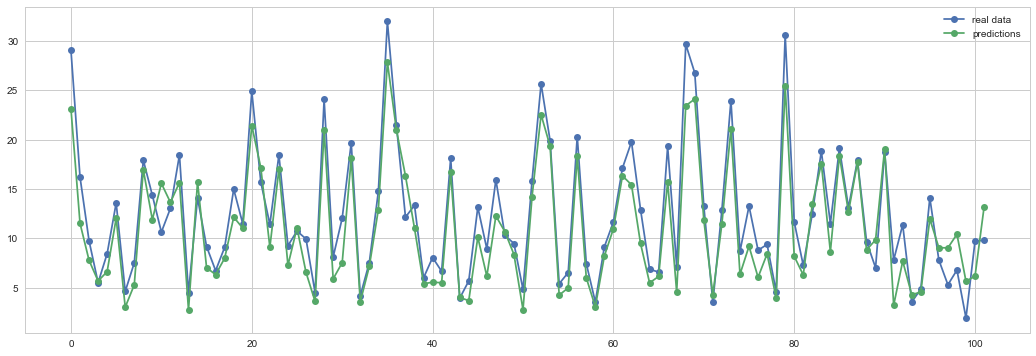

In [181]:
# epochs=50
plt.figure(figsize=(18,6))
plt.plot(range(len(y_test4)), y_test4, '-o', label = 'real data')
plt.plot(range(len(y_test4)), y_test4_rnn_predictions, '-o', label = 'predictions')
plt.legend();

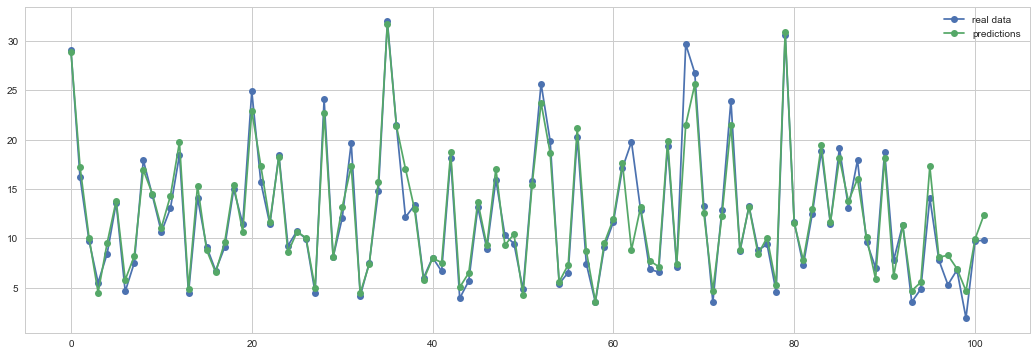

In [200]:
# epochs=200
plt.figure(figsize=(18,6))
plt.plot(range(len(y_test4)), y_test4, '-o', label = 'real data')
plt.plot(range(len(y_test4)), y_test4_rnn_predictions, '-o', label = 'predictions')
plt.legend();

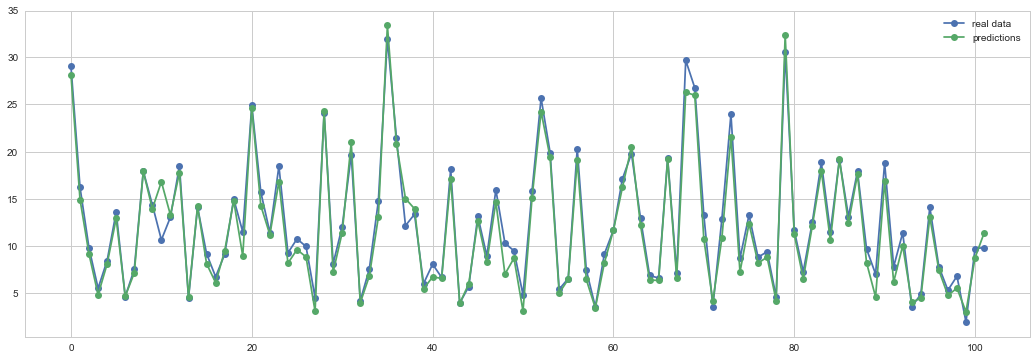

In [195]:
# epochs=800
plt.figure(figsize=(18,6))
plt.plot(range(len(y_test4)), y_test4, '-o', label = 'real data')
plt.plot(range(len(y_test4)), y_test4_rnn_predictions, '-o', label = 'predictions')
plt.legend();